# Problem Statement
Multiply 100 random matrices of size 1k x 1k with a constant matrix of size 1k x 1k and generate the result (Table, Graph and CPU usage)

In [1]:
import os
import sys
import platform
import multiprocessing
import threading
import random as r
import numpy as np
import time

In [2]:
#Number of Cores
numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

Num of cores are:  8


In [3]:
#function for multiplying two matrices
def matrix_multiply(mat1, mat2):
    return np.dot(mat1, mat2)

# Function to perform matrix multiplications within a thread
def perform_matrix_multiplications(num_matrices, matrix_size, constant_matrix, results, results_lock):
    for _ in range(num_matrices):
        # Generate a random matrix
        random_matrix = np.random.rand(*matrix_size)
        
        # Perform matrix multiplication
        result = matrix_multiply(random_matrix, constant_matrix)
        
        # Append result to the shared results list using a lock
        with results_lock:
            results.append(result)

In [4]:
def main(num_threads):
    # Define matrix dimensions
    matrix_size = (1000, 1000)
    num_matrices = 100

    # Create random matrices and constant matrix
    constant_matrix = np.random.rand(*matrix_size)

    # List to hold results
    results = []
    results_lock = threading.Lock()  # Lock to safely append results

    # List to hold threads
    threads = []

    # Calculate number of matrices each thread will handle
    matrices_per_thread = num_matrices // num_threads
    remaining_matrices = num_matrices % num_threads

    # Start time measurement
    start_time = time.time()

    # Perform matrix multiplications with specified number of threads
    for _ in range(num_threads):
        # Determine number of matrices this thread will handle
        if remaining_matrices > 0:
            num_matrices_this_thread = matrices_per_thread + 1
            remaining_matrices -= 1
        else:
            num_matrices_this_thread = matrices_per_thread

        # Create and start a new thread
        thread = threading.Thread(
            target=perform_matrix_multiplications,
            args=(num_matrices_this_thread, matrix_size, constant_matrix, results, results_lock),
        )
        threads.append(thread)
        thread.start()

    # Wait for all threads to complete
    for thread in threads:
        thread.join()

    # End time measurement
    end_time = time.time()

    # Calculate total time taken
    total_time = end_time - start_time

    print(f"Number of results: {len(results)}")
    print(f"Total time taken with {num_threads} threads: {total_time:.4f} seconds")
    return total_time


In [5]:
num_threads=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
tt=[]
for i in range(0,len(num_threads)):
    tt.append(main(num_threads[i]))

Number of results: 100
Total time taken with 1 threads: 2.1262 seconds
Number of results: 100
Total time taken with 2 threads: 2.0350 seconds
Number of results: 100
Total time taken with 3 threads: 2.0199 seconds
Number of results: 100
Total time taken with 4 threads: 1.9775 seconds
Number of results: 100
Total time taken with 5 threads: 2.0517 seconds
Number of results: 100
Total time taken with 6 threads: 2.1151 seconds
Number of results: 100
Total time taken with 7 threads: 2.1022 seconds
Number of results: 100
Total time taken with 8 threads: 2.2494 seconds
Number of results: 100
Total time taken with 9 threads: 2.7193 seconds
Number of results: 100
Total time taken with 10 threads: 3.2712 seconds
Number of results: 100
Total time taken with 11 threads: 3.6107 seconds
Number of results: 100
Total time taken with 12 threads: 3.7561 seconds
Number of results: 100
Total time taken with 13 threads: 3.7619 seconds
Number of results: 100
Total time taken with 14 threads: 3.7821 seconds
N

In [6]:
tt

[2.1262097358703613,
 2.034986972808838,
 2.019918918609619,
 1.977522850036621,
 2.0516679286956787,
 2.115055799484253,
 2.102156162261963,
 2.2494029998779297,
 2.7193379402160645,
 3.2712349891662598,
 3.610685110092163,
 3.7560718059539795,
 3.7618870735168457,
 3.782144069671631,
 3.801882743835449,
 4.055732250213623]

| no. of threads | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15   | 16   |
|-------------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|
| Total Time  | 2.126| 2.035| 2.020| 1.978| 2.052| 2.115| 2.102| 2.249| 2.719| 3.271| 3.611| 3.756| 3.762| 3.782| 3.802| 4.056|


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

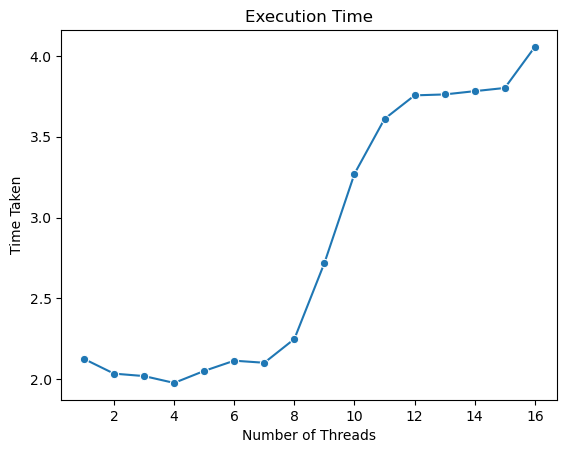

In [8]:
sns.lineplot(x=num_threads, y=tt, marker='o')
plt.title('Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.show()

# CPU Usage
![CPU Usage](https://i.postimg.cc/WzDhmFdR/Screenshot-2024-04-09-at-5-14-28-PM.png)
